## <center><h1>**Data preprocessing**</h1>
<center> </br>Astrid Jourdan & Peio Loubière & Yannick Le Nir<br/>

This tutorial is about data preparation:
- import a dataset
- checking the type of the variables
- checking the distribution of the target variable
- creation of a training set and a test set
- scaling the variables
- encoding the categorical variables

In [4]:
# Library importations

import math
import pandas as pnd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Data importation**
<br/>
The dataset is the multi-spectral values of pixels in 3x3 neighborhoods in a satellite image, and the classification associated with the central pixel in each neighborhood. The target variable is the soil type : <br/><center><i> red soil - cotton crop - grey soil - damp grey soil - soil with vegetation stubble - very damp grey soil </i></center>

We display the dimensions and the first three rows to make sure that the file has been read correctly <br/>
<br/>

In [5]:
# File import
dataset = pnd.read_csv("Landsat.txt", delimiter=" ")

# Displays the column and row names
print("The column names are:",dataset.columns)
print("The row names are:",dataset.index)

# Display the dimensions
print("The dimension of the dataset : ",dataset.shape)

# Display the first three rows
dataset.head(3)
# Display all the dataset
#print(dataset.info)


The column names are: Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'SoilType'],
      dtype='object')
The row names are: Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       6426, 6427, 6428, 6429, 6430, 6431, 6432, 6433, 6434, 6435],
      dtype='int64', length=6435)
The dimension of the dataset :  (6435, 37)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x28,x29,x30,x31,x32,x33,x34,x35,x36,SoilType
1,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,grey soil
2,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,grey soil
3,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,grey soil


<br/> **Variables type**<br/>
All the input variables are numerical in this dataset (int64). The target variable is categorical (object).
For the preprocessing, we need to get the list of numerical variables (for the normalization) and the list of categorical variables (for the encoding).

In [3]:
# Displays the variable type
print("The variable type: \n",dataset.dtypes)
print("\n")

# Displays the categorical variables
ListVarCat = dataset.select_dtypes(include=['object']).columns.tolist()
print("List of categorical variables: \n", ListVarCat)
print("\n")

# Display the numeric variables
ListVarNum = dataset.select_dtypes(exclude=['object']).columns.tolist()
print("List of numerical variables: \n",ListVarNum)


The variable type: 
 x1           int64
x2           int64
x3           int64
x4           int64
x5           int64
x6           int64
x7           int64
x8           int64
x9           int64
x10          int64
x11          int64
x12          int64
x13          int64
x14          int64
x15          int64
x16          int64
x17          int64
x18          int64
x19          int64
x20          int64
x21          int64
x22          int64
x23          int64
x24          int64
x25          int64
x26          int64
x27          int64
x28          int64
x29          int64
x30          int64
x31          int64
x32          int64
x33          int64
x34          int64
x35          int64
x36          int64
SoilType    object
dtype: object


List of categorical variables: 
 ['SoilType']


List of numerical variables: 
 ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 

**Target distribution**
<br/>
It is necessary to check the distribution of the target variable to ensure that the classes are not unbalanced. We display the table of the numbers of examples in each class as well as a frequency diagram. <br/>
<br/>
When the target variable is unbalanced two common stategies are used :

*   
Data reduction : when the number of examples in each class is large enough,

*   Data augmentation : when the number of examples in a class is too small, we increase the size of the class by artificially creating new examples in this class (with images we apply transformations: filter, rotation,...)


Distribution : 
 SoilType
red soil               1533
very damp grey soil    1508
grey soil              1358
vegetation stubble      707
cotton crop             703
damp grey soil          626
Name: count, dtype: int64


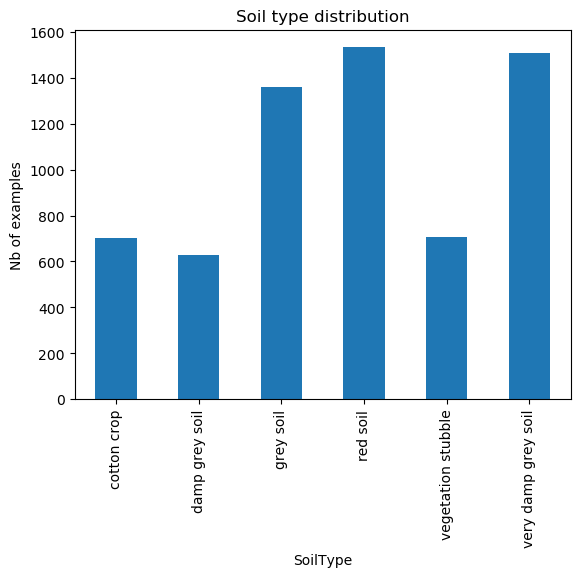

In [7]:
# Distribution
print("Distribution : \n", dataset['SoilType'].value_counts())
print("\n")

# Barplot
dataset.groupby('SoilType').size().plot.bar(title="Soil type distribution", ylabel='Nb of examples')


# or with a pie
# dataset.groupby('SoilType').size().plot.pie(title="Soil type distribution", ylabel='', autopct='%.2f')


# **Data preprocessing**
**Separation of the input variables and the target variable**

We use the function *drop* to remove the target variable and create a dataset with the input variables (x) only.
We create a vector with the target variable only (y).

In [8]:
x = dataset.drop(columns=['SoilType']) # Attribute columns
y = dataset['SoilType'] # Target column

print("Inputs: \n",x[0:3])
print("\n")
print("Target : \n",y[0:3])
print("\n")

n = x.shape[0] # number of examples
d = x.shape[1] #number of input variables
print("The number of examples is",n)
print("The number of input variables is",d)

Inputs: 
    x1   x2   x3  x4  x5   x6   x7  x8  x9  x10  ...  x27  x28  x29  x30  x31  \
1  92  115  120  94  84  102  106  79  84  102  ...  134  104   88  121  128   
2  84  102  106  79  84  102  102  83  80  102  ...  128  100   84  107  113   
3  84  102  102  83  80  102  102  79  84   94  ...  113   87   84   99  104   

   x32  x33  x34  x35  x36  
1  100   84  107  113   87  
2   87   84   99  104   79  
3   79   84   99  104   79  

[3 rows x 36 columns]


Target : 
 1    grey soil
2    grey soil
3    grey soil
Name: SoilType, dtype: object


The number of examples is 6435
The number of input variables is 36


**Training, validation and test subsets**
- The training data set is used to find the optimal parameters of the model (the weights for a neural network). Here, we use 70% of the original dataset.
- The validation data set is used to fing the best hyperparameters of the model (number of layers, activation functions, optimization algorithm parameters,...). Here we used 15% of the original data set
- The test data set is use to measure the performance of the model with examples that were never used to build it. Here, we use 15% of the original dataset.
 </br>
  </br>
The function
 </br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<i>train_test_split(x, y, train_size = fraction of the training set)</i></br>
from library sklearn, splits a dataset (x,y) into two parts. We use it a fisrt time with the original data to create the training dataset and a second time with the rest of the dataset to obtain the validation and test datasets.


In [10]:
# First Split : 70% training set and 30% for the test and validation sets
xTrain, xRest, yTrain, yRest = train_test_split(x, y, train_size = 0.7, random_state = 42)

print("Dimensions of the train dataset:",xTrain.shape)
print("Dimensions of the remaining dataset:",xRest.shape)
print("\n")

# Second split : 15% for the validation set and 15% for the test set
xVal, xTest, yVal, yTest = train_test_split(xRest, yRest, train_size = 0.5, random_state = 42)

print("Dimensions of the validation dataset:",xVal.shape)
print("Dimensions of the test dataset:",xTest.shape)
print("\n")

xTrain.head()


Dimensions of the train dataset: (4504, 36)
Dimensions of the remaining dataset: (1931, 36)


Dimensions of the validation dataset: (965, 36)
Dimensions of the test dataset: (966, 36)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36
1289,82,100,100,85,78,87,92,78,63,56,...,114,90,93,115,110,90,89,102,105,80
1116,80,89,94,76,72,81,94,76,57,49,...,96,79,84,99,96,79,75,87,93,75
583,56,53,108,107,49,37,122,125,43,32,...,129,140,44,34,124,133,44,34,124,136
3648,88,112,122,92,88,107,113,92,88,107,...,104,81,86,104,108,85,90,104,108,89
1565,71,75,83,70,68,75,83,67,71,79,...,73,66,66,71,80,66,66,75,80,70


We can check the target distribution in the training set. The function <i>groupby</i> works with a dataframe. The resulting y (yTrain, yVal and yTest) after splitting is no more a dataframe. In particular, we loose the name of the column. We have to transform it into a dataframe.

y is a vector:
 1289              grey soil
1116         damp grey soil
583             cotton crop
3648              grey soil
1565    very damp grey soil
Name: SoilType, dtype: object


y is a dataframe:
                  SoilType
1289            grey soil
1116       damp grey soil
583           cotton crop
3648            grey soil
1565  very damp grey soil


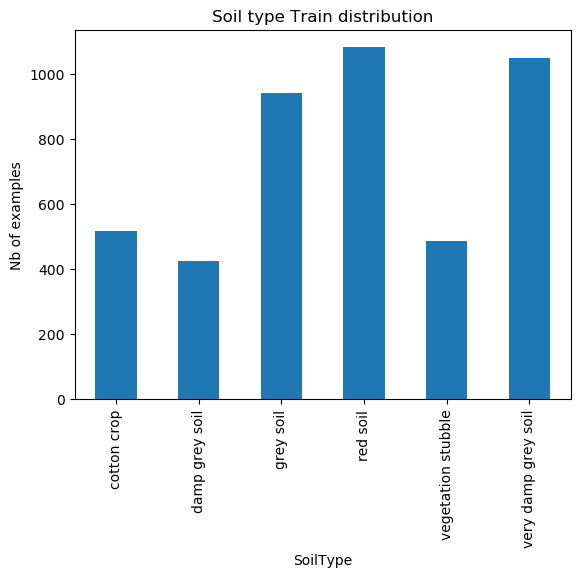

In [11]:
print("y is a vector:\n",yTrain[0:5]) # yTrain is a vector and not a dataframe
print("\n")

yTrain= pnd.DataFrame(yTrain, columns=["SoilType"]) # Transformation into a dataframe

print("y is a dataframe:\n",yTrain[0:5]) # yTrain is now a dataframe

# Verification of the target distribution
yTrain.groupby('SoilType').size().plot.bar(title="Soil type Train distribution", ylabel='Nb of examples')


yVal= pnd.DataFrame(yVal, columns=["SoilType"])
yTest= pnd.DataFrame(yTest, columns=["SoilType"])

**Encoding the target variable**
 </br>
To encode the categorical variables into binary variables, we use the function </br>
</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<i>pnd.get_dummies(X)</i></br>
</br>
where X is a dataset with only categorical variables.</br>
</br>

In [12]:
# Encode the target variable in the training set
print("Target variable before binarization \n",yTrain.head(3)) # Before binarization
print("\n")
yTrain=pnd.get_dummies(yTrain)
print("Target variable after binarization \n",yTrain.head(3)) # After binarization
print("\n")

# Number of categories
p = yTrain.shape[1] #number of classes
print("The number of categories is",p)


yVal=pnd.get_dummies(yVal)
yTest=pnd.get_dummies(yTest)

Target variable before binarization 
             SoilType
1289       grey soil
1116  damp grey soil
583      cotton crop


Target variable after binarization 
       SoilType_cotton crop  SoilType_damp grey soil  SoilType_grey soil  \
1289                 False                    False                True   
1116                 False                     True               False   
583                   True                    False               False   

      SoilType_red soil  SoilType_vegetation stubble  \
1289              False                        False   
1116              False                        False   
583               False                        False   

      SoilType_very damp grey soil  
1289                         False  
1116                         False  
583                          False  


The number of categories is 6


<br/>
Now that the datasets are ready, we will normalize the training set. To each variable X, we apply the transformation (X-mu)/sigma where mu is the mean of X and sigma its standard deviation. The result is a variable such that mu=0 and sigma=1.
Then, we apply the same transformation to the test and validation datasets (with mu and sigma from the training set).
<br/>
<br/>

In [13]:
# Normalization
scaler = StandardScaler()


# Training set
xTrain_scaled = scaler.fit(xTrain)
print("Training set")
print("Means before normalization: ", xTrain_scaled.mean_)
print("Variance before normalization: ", xTrain_scaled.var_)
print("\n")


# Normalization of the training set
xTrain_scaled = scaler.transform(xTrain)
print("Means after normalization: ",xTrain_scaled.mean(axis=0))
print("Variance after normalization: ",xTrain_scaled.var(axis=0))
print("\n")
xTrain_scaled= pnd.DataFrame(xTrain_scaled, columns=[xTrain.columns.tolist()]) # transform into a dataframe with the column names of xTrain
xTrain_scaled.head()


Training set
Means before normalization:  [69.24666963 83.36567496 99.39431616 82.82748668 68.95692718 82.96025755
 99.21936057 82.76154529 68.73823268 82.63832149 99.01865009 82.69293961
 69.12211368 83.23645648 99.36101243 82.78863233 68.8785524  82.94649201
 99.26021314 82.81216696 68.69782416 82.68183837 99.13188277 82.75199822
 69.01087922 83.19760213 99.2955151  82.80195382 68.79351687 82.95248668
 99.22313499 82.76687389 68.62433393 82.68716696 99.06927176 82.72091474]
Variance before normalization:  [186.01708482 534.68666371 278.33252542 364.64852512 185.94841116
 534.58567631 277.97674773 366.49287292 182.40461286 533.23619576
 276.90640173 364.82955939 185.42336534 530.00914162 279.17650839
 364.85674467 184.4042114  532.19140865 282.09436727 368.32750738
 182.86583896 533.42252984 281.15667443 368.91562656 186.1968177
 528.68120207 278.88980227 366.12552016 184.18116578 529.50440323
 280.73196033 367.86305897 181.63152154 527.99161151 279.4476881
 368.22872776]


Means afte

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36
0,0.935077,0.719375,0.036305,0.113769,0.663162,0.174721,-0.433007,-0.248723,-0.424874,-1.153578,...,0.880508,0.376183,1.783648,1.392706,0.643201,0.377123,1.511876,0.840490,0.354779,-0.141793
1,0.788436,0.243664,-0.323336,-0.357539,0.223160,-0.084782,-0.313050,-0.353194,-0.869130,-1.456715,...,-0.197336,-0.198697,1.120485,0.697386,-0.192368,-0.196398,0.473075,0.187693,-0.363067,-0.402355
2,-0.971248,-1.313207,0.515826,1.265857,-1.463516,-1.987805,1.366349,2.206354,-1.905728,-2.192903,...,1.778712,2.989277,-1.826903,-2.127355,1.478769,2.619070,-1.827128,-2.118854,1.491368,2.776502
3,1.374998,1.238333,1.354989,0.480343,1.396500,1.039731,0.826542,0.482577,1.426193,1.054988,...,0.281706,-0.094173,1.267855,0.914673,0.523834,0.116431,1.586076,0.927529,0.534240,0.327218
4,0.128555,-0.361786,-0.982678,-0.671745,-0.070175,-0.344285,-0.972813,-0.823315,0.167467,-0.157558,...,-1.574582,-0.878102,-0.205839,-0.519426,-1.147303,-0.874196,-0.194726,-0.334544,-1.140733,-0.662918


In [14]:
# Transformation of the validation set
xVal_scaled = scaler.transform(xVal)
print("Validation set")
print("Means after normalization: ",xVal_scaled.mean(axis = 0))
print("Variance after normalization: ",xVal_scaled.var(axis = 0))
print("\n")
xVal_scaled= pnd.DataFrame(xVal_scaled, columns=[xTrain.columns.tolist()]) # transform into a dataframe with the column names of xTrain



Validation set
Means after normalization:  [ 0.03806297  0.04822644  0.00847765 -0.01989018  0.04533508  0.06034239
  0.01052372 -0.02240403  0.03633888  0.04927459 -0.00305126 -0.03302338
  0.03364885  0.04032288  0.01324894 -0.01009241  0.04374124  0.04665539
  0.00770581 -0.02309599  0.03851489  0.03661348 -0.01361281 -0.02900893
  0.03102275  0.03061585  0.00284372 -0.00194346  0.03117331  0.03327319
  0.00053652 -0.00929484  0.02464502  0.03368312 -0.00618954 -0.02601207]
Variance after normalization:  [1.02708863 0.96082014 0.96926601 0.9169355  0.99621928 0.95006138
 0.96563254 0.90478181 1.03280264 0.94786497 0.97045569 0.93074414
 1.02975115 0.96434118 0.9822623  0.92118313 1.02053643 0.96691515
 0.9540316  0.9053912  1.00217226 0.95489054 0.941868   0.89784876
 1.01304065 0.97805133 0.96364864 0.93864466 1.00502383 0.97525418
 0.95704664 0.92357435 0.99150905 0.96434212 0.95201064 0.88927197]


In [15]:


# Transformation of the test set
xTest_scaled = scaler.transform(xTest)
print("Test set")
print("Means after normalization: ",xTest_scaled.mean(axis = 0))
print("Variance after normalization: ",xTest_scaled.var(axis = 0))
print("\n")
xTest_scaled= pnd.DataFrame(xTest_scaled, columns=[xTrain.columns.tolist()]) # transform into a dataframe with the column names of xTrain



Test set
Means after normalization:  [ 0.03686633  0.01785182 -0.04988248 -0.06203622  0.04916308  0.02132937
 -0.05394977 -0.06962879  0.04958155  0.02426981 -0.06314359 -0.07329536
  0.04835305  0.02925391 -0.03306828 -0.04004051  0.03829275  0.0182495
 -0.05148757 -0.0494383   0.03122571  0.01507548 -0.05879867 -0.0693339
  0.04297635  0.02035524 -0.03505212 -0.04726764  0.04275107  0.02266891
 -0.04476559 -0.04241231  0.02641503  0.0161373  -0.05089795 -0.04884344]
Variance after normalization:  [0.93780971 0.897971   0.99756965 0.94123304 0.92645656 0.91127519
 1.0237319  0.94944655 0.92892535 0.9170223  1.02202096 0.9803724
 0.95277163 0.93366327 0.98305822 0.95887333 0.93501027 0.93565734
 0.98074804 0.98323121 0.93259871 0.92139895 1.0239438  1.00253349
 0.92076455 0.91011847 0.96460118 0.95911414 0.91498989 0.92806977
 0.99987362 0.97964065 0.93214584 0.94049261 1.02788125 1.01396319]


 <center>
<h1>EXERCICE</h1>
</center>

The dataset <i>Drug_Consumption.csv</i> contains records for respondents. For each respondent, we known: <br/>
<br/>
<ul>
<li>Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking). </li>
<li>Personal information which include level of education, age, gender, country of residence and ethnicity.</li>
<li>Cocaine consumption.</li>
<br/>

<ol>
<li>How many respondents have been recorded? Display the 3th rows of the dataset.</li>
<li>How many variables are in the dataset? What is their type?</li>
<li>What is the target variable? What is its type? Display its distribution.</li>
<li>Split the dataset into a training, validation and test datasets (80%-10%-10%).</li>
<li>Encode the target variable.</li>
<li>Extract the numeric variables and normalize them.</li>
<li>Extract the categorical variables and encode them.</li>
<li>Build a new x dataset with the encoded input variables and the standardized variables.</li>
<ol/>

In [51]:
## QUESTION 1
##
data = pnd.read_csv("Drug_Consumption.csv", delimiter=";")
print("Number of records", data.count()[0])
print("Third record:\n", data.iloc[2])

##
## Warning The delimiter in the data file is ";"

Number of records 1885
Third record:
 Age                                                 18-24
Education            college or university but no diploma
Country                                                UK
Ethnicity                                           White
Gender                                                  0
Neuroticism                                            56
Extraversion                                           24
Openness                                               44
Agreeableness                                          43
Conscientiousness                                      26
Impulsiveness                                    -1.37983
SensationSeeing                                  -1.54858
Cocaine                                        Never used
Name: 2, dtype: object


In [60]:
## QUESTION 2
##
print("Number of variables:", data.columns.size)
data.dtypes


Number of variables: 13


Age                   object
Education             object
Country               object
Ethnicity             object
Gender                 int64
Neuroticism            int64
Extraversion           int64
Openness               int64
Agreeableness          int64
Conscientiousness      int64
Impulsiveness        float64
SensationSeeing      float64
Cocaine               object
dtype: object

The target value is cocaine


Type: Index(['Age', 'Education', 'Country', 'Ethnicity', 'Gender', 'Neuroticism',
       'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'SensationSeeing', 'Cocaine'],
      dtype='object')


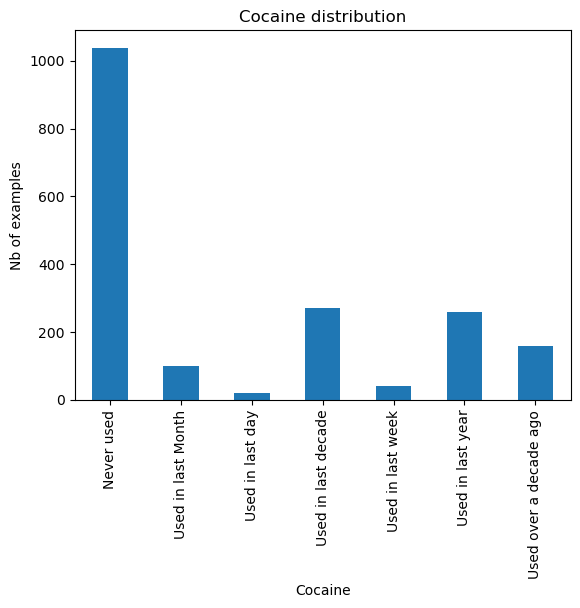

In [66]:
## QUESTION 3
##
print("Type:", data.columns)

data.groupby('Cocaine').size().plot.bar(title="Cocaine distribution", ylabel='Nb of examples')
##

In [ ]:
## QUESTION 4
##
## Your code here
##

In [ ]:
## QUESTION 5
##
## Your code here
##

In [ ]:
## QUESTION 6
##
## Complet the code
##

# List of numerical variables
numeric_list = ??
# Standardization
numeric_xTrain=?? # training set with the numerical variables
numeric_xTrain_scaled = scaler.fit(numeric_xTrain)
numeric_xTrain_scaled = scaler.transform(numeric_xTrain)
print("Training set")
print("Means after normalization: ",numeric_xTrain_scaled.mean(axis = 0))
print("Variance after normalization: ",numeric_xTrain_scaled.var(axis = 0))
print("\n")

# Transformation into a dataframe
numeric_xTrain_scaled=pnd.DataFrame(numeric_xTrain_scaled, index=xTrain.index,columns=numeric_list)

In [ ]:
## QUESTION 6 (continued)
##
## Your code here
##

To encode the categorical variables into binary variables, we use the function </br>
</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<i>pnd.get_dummies(X)</i></br>
</br>
where X is a dataset with only categorical variables.</br>
</br>
We process in 3 steps : </br>
<ol>
<li>We extract the categorical variables from the dataset.</li>
<li>We encode the categorical variables.</li>
<li>We rebuilt the dataset by concatening the encoded variables, the numerical variables and the target variable. </li>
<ol/>

In [ ]:
## QUESTION 7
##
## Complet the code
##
# List of the categorical variables
cat_list=?? # List of categorical variables
print(cat_list)
print("\n")

# Encode the categorical variables in the training set
xTrain_cat=xTrain[cat_list[:-1]] # xTrain set with the categorical variables except the target Cocaine
print(xTrain_cat.head(3)) # Display the categorical variables before binarization
print("\n")
xTrain_cat_encoded=pnd.get_dummies(xTrain_cat)
print(xTrain_cat_encoded.head(3)) # Display the categorical variables after binarization

# Encode the categorical variables in the test set
??
??

To concatenate dataframes, data1, data2, ..., we use the function
</br>
</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<i>pnd.concat([data1,data2,...],axis=1)</i></br>
</br>
where <i>axis</i> is the axis to concatenate along (axis=1 for columns and axis=0 for rows)


In [ ]:
## QUESTION 8
##
## Complet the code
##

# Concatenate the numerical variables and the encoded variables for the training set
xTrain_ready=pnd.concat([numeric_xTrain_scaled,xTrain_cat_encoded],axis=1) # Concatenates tables by columns (axis=1)
print("The number of variables is the new dataset is",xTrain_ready.shape[1])

# Concatenate the numerical variables and the encoded variables for the test set
??


xTrain_ready.head(3)